In [1]:
# Packages:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from urllib.request import urlopen
import json
import datetime
import numpy as np
import warnings
from textblob import TextBlob
import re
from wordcloud import WordCloud
import seaborn as sns
import scipy.stats as st
import scipy
from scipy import stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv('../data/processed/benioff_cleaned.csv')
df.head()

,Date,Price,Price_scaled,Price_delta,Tweets,Agg_count,Agg_retweet,Agg_favorite,Subjectivity_mean,Polarity_mean,Polarity_scaled,Polarity_delta,Favorite_scaled,Retweet_scaled
0,2021-02-01,228.460007,0.221065,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-02-02,234.199997,0.275925,0.054860,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-02-03,234.820007,0.281850,0.005926,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-02-04,237.979996,0.312052,0.030202,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-02-05,238.889999,0.320749,0.008697,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


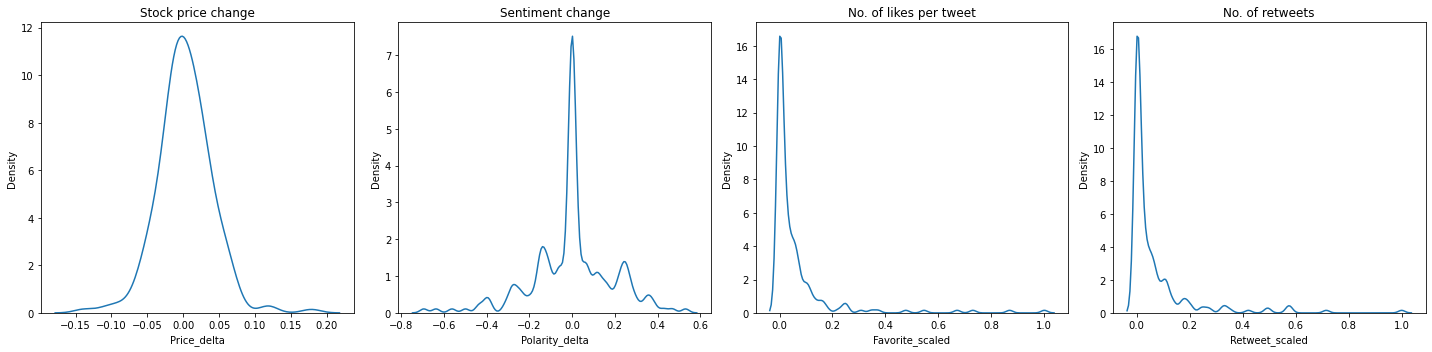

In [3]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 5))

sns.kdeplot(ax=ax1, x=df['Price_delta'], bw_adjust=1).set_title('Stock price change')
sns.kdeplot(ax=ax2, x=df['Polarity_delta'], bw_adjust=0.27).set_title('Sentiment change')
sns.kdeplot(ax=ax3, x=df['Favorite_scaled'], bw_adjust=0.27).set_title('No. of likes per tweet')
sns.kdeplot(ax=ax4, x=df['Retweet_scaled'], bw_adjust=0.27).set_title('No. of retweets')

plt.tight_layout()

In [4]:
df.describe()

,Price,Price_scaled,Price_delta,Agg_count,Agg_retweet,Agg_favorite,Subjectivity_mean,Polarity_mean,Polarity_scaled,Polarity_delta,Favorite_scaled,Retweet_scaled
count,211.000000,211.000000,210.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,248.700947,0.414517,0.002571,15.099526,8259.966825,1168.436019,0.263083,0.123792,0.336401,-0.000949,0.059327,0.065940
std,27.740858,0.265133,0.038055,17.464646,16493.223309,2610.082890,0.183160,0.106936,0.253289,0.190394,0.132525,0.132105
min,205.330002,0.000000,-0.139348,0.000000,0.000000,0.000000,0.000000,-0.062500,0.000000,-0.694046,0.000000,0.000000
25%,230.410004,0.239702,-0.017944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.099629,0.000000,0.000000
50%,243.389999,0.363758,0.000956,12.000000,1443.000000,276.000000,0.309590,0.119271,0.360321,0.000000,0.014014,0.011233
75%,265.239990,0.572589,0.025471,21.500000,8565.000000,1183.500000,0.400727,0.205141,0.530540,0.091494,0.060091,0.068297
max,309.959991,1.000000,0.178629,117.000000,124849.000000,19695.000000,0.630556,0.441970,1.000000,0.530568,1.000000,1.000000


In [5]:
#from scipy.stats import boxcox

#df['transformed_return'], lam = boxcox(df["Return"])


In [6]:
numeric_df = df.filter(items=['Price_scaled','Price_delta', 'Polarity_delta', 'Favorite_scaled', 'Retweet_scaled'])
corr1 = numeric_df.corr()
corr2 = numeric_df.corr(method='spearman')

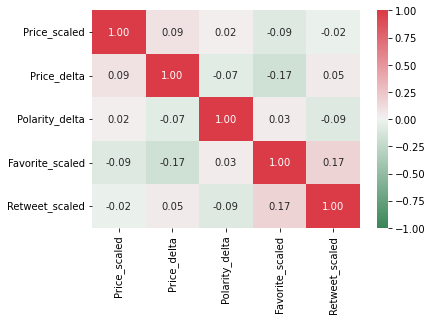

In [7]:
sns.heatmap(corr1, annot=True, cmap=sns.diverging_palette(140, 10, as_cmap=True), fmt='.2f', vmin=-1, vmax=1)
plt.show()

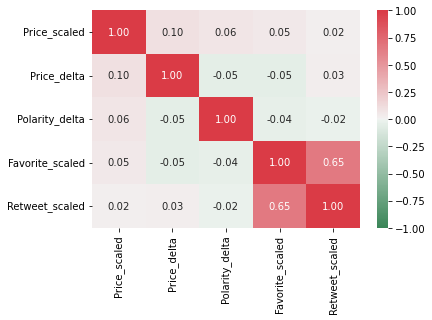

In [8]:
sns.heatmap(corr2, annot=True, cmap=sns.diverging_palette(140, 10, as_cmap=True), fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [9]:
print("H0: the changes in stock market prices are similar on average compared to the changes in CEO's Twitter sentiment") 
print("H1: the changes in stock market prices are different on average compared to the changes in CEO's Twitter sentiment")

statistic = st.ttest_ind(df['Price_delta'], df['Polarity_delta'], axis=0, equal_var=False, alternative='two-sided', nan_policy='omit')[0]
pvalue = st.ttest_ind(df['Price_delta'], df['Polarity_delta'], axis=0, equal_var=False, alternative='two-sided', nan_policy='omit')[1]

print('statistic = ',statistic)
print('pvalue = ',pvalue)

if pvalue<= 0.05:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')
    

H0: the changes in stock market prices are similar on average compared to the changes in CEO's Twitter sentiment
H1: the changes in stock market prices are different on average compared to the changes in CEO's Twitter sentiment
statistic =  0.2633218672382727
pvalue =  0.792541547491566
We fail to reject the null hypothesis


C:\Users\Amalia\anaconda3\envs\dstoolkit\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


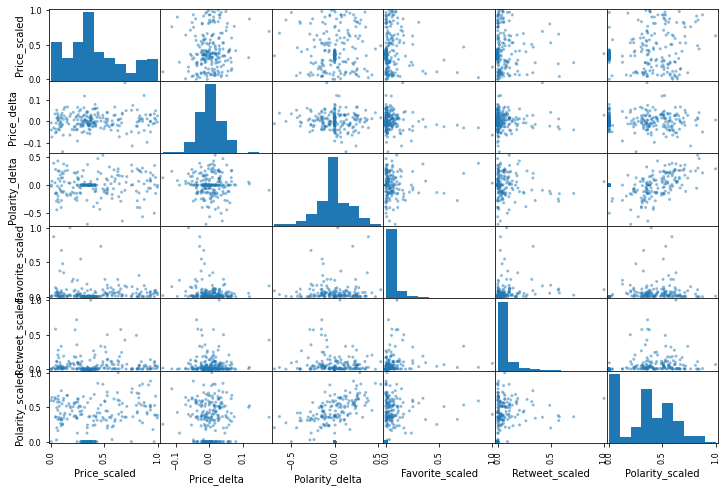

In [10]:
from pandas.plotting import scatter_matrix
df_sm = df[['Price_scaled','Price_delta', 'Polarity_delta','Favorite_scaled', 'Retweet_scaled', 'Polarity_scaled']]
df_sm.dropna(inplace=True)
scatter_matrix(df_sm, figsize=(12,8));

In [11]:
scipy.stats.shapiro(df_sm['Price_delta'])

ShapiroResult(statistic=0.9662725329399109, pvalue=6.542717164848e-05)

In [12]:
scipy.stats.shapiro(df_sm['Polarity_delta'])

ShapiroResult(statistic=0.9557610750198364, pvalue=4.2818555812118575e-06)

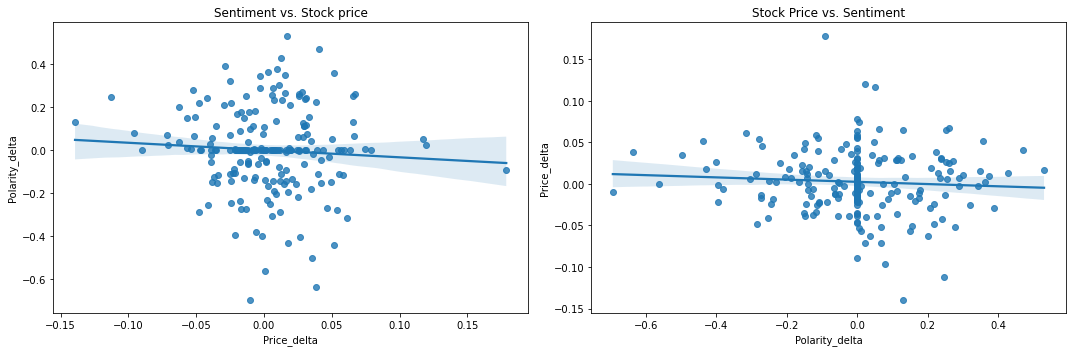

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
sns.regplot(data = df_sm, x='Price_delta', y='Polarity_delta', lowess=False, ax=ax1).set(title='Sentiment vs. Stock price')
sns.regplot(data = df_sm, x='Polarity_delta', y='Price_delta', lowess=False, ax=ax2).set(title='Stock Price vs. Sentiment')

plt.tight_layout()

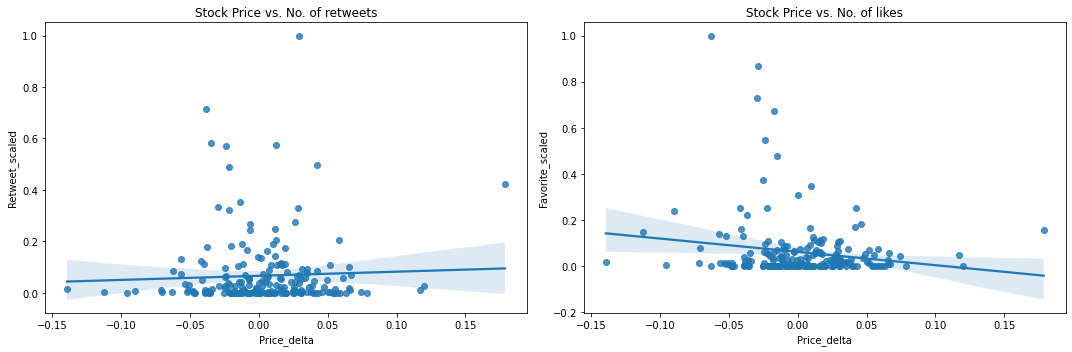

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
sns.regplot(data = df_sm, x='Price_delta', y='Retweet_scaled', lowess=False, ax=ax1). set(title='Stock Price vs. No. of retweets')
sns.regplot(data = df_sm, x='Price_delta', y='Favorite_scaled', lowess=False, ax=ax2). set(title='Stock Price vs. No. of likes')

plt.tight_layout()

In [15]:
X = df_sm['Price_delta']
y = df_sm['Polarity_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Polarity_delta   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9459
Date:                Sun, 05 Dec 2021   Prob (F-statistic):              0.332
Time:                        11:49:37   Log-Likelihood:                 50.818
No. Observations:                 210   AIC:                            -97.64
Df Residuals:                     208   BIC:                            -90.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.542e-05      0.013     -0.006      

In [16]:
X = df_sm['Polarity_delta']
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9459
Date:                Sun, 05 Dec 2021   Prob (F-statistic):              0.332
Time:                        11:49:37   Log-Likelihood:                 389.43
No. Observations:                 210   AIC:                            -774.9
Df Residuals:                     208   BIC:                            -768.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0026      0.003      0.

In [17]:
X = df_sm[['Favorite_scaled']]
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     5.869
Date:                Sun, 05 Dec 2021   Prob (F-statistic):             0.0163
Time:                        11:49:37   Log-Likelihood:                 391.88
No. Observations:                 210   AIC:                            -779.8
Df Residuals:                     208   BIC:                            -773.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0054      0.003     

In [18]:
X = df_sm[['Retweet_scaled']]
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.4414
Date:                Sun, 05 Dec 2021   Prob (F-statistic):              0.507
Time:                        11:49:37   Log-Likelihood:                 389.18
No. Observations:                 210   AIC:                            -774.4
Df Residuals:                     208   BIC:                            -767.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0017      0.003      0.

In [19]:
X = df_sm[['Retweet_scaled', 'Polarity_delta', 'Favorite_scaled']]
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.570
Date:                Sun, 05 Dec 2021   Prob (F-statistic):             0.0554
Time:                        11:49:37   Log-Likelihood:                 392.82
No. Observations:                 210   AIC:                            -777.6
Df Residuals:                     206   BIC:                            -764.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0042      0.003     

In [20]:
X = df_sm[['Retweet_scaled', 'Polarity_delta', 'Favorite_scaled']]
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.570
Date:                Sun, 05 Dec 2021   Prob (F-statistic):             0.0554
Time:                        11:49:37   Log-Likelihood:                 392.82
No. Observations:                 210   AIC:                            -777.6
Df Residuals:                     206   BIC:                            -764.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0042      0.003     

In [21]:
X = df_sm[['Polarity_delta', 'Favorite_scaled']]
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.340
Date:                Sun, 05 Dec 2021   Prob (F-statistic):             0.0374
Time:                        11:49:37   Log-Likelihood:                 392.29
No. Observations:                 210   AIC:                            -778.6
Df Residuals:                     207   BIC:                            -768.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0054      0.003     